# Global Warming Stock Portfolio Risk and Returns 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Global Warming Stocks
title = 'Global Warming'
symbols = ['NVEE','SPWR','PLUG','BEP', 'CSIQ', 'SEDG', 'POOL', 'FSLR', 'NEE', 'TTE' , 'BEPC']
start = '2012-01-01'
end = '2021-11-05'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
9 years


In [5]:
number_of_years = delta.years

In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

118

In [7]:
days = (df.index[-1] - df.index[0]).days
days

2957

In [8]:
df.head()

,NVEE,SPWR,PLUG,BEP,CSIQ,SEDG,POOL,FSLR,NEE,TTE,BEPC
Date,,,,,,,,,,,
2013-09-30,7.70,17.131632,0.74,9.078449,16.990000,NaN,51.033543,40.209999,16.225380,36.218491,NaN
2013-10-01,7.70,17.871643,0.71,9.081855,18.180000,NaN,51.051739,42.139999,16.207161,36.349808,NaN
2013-10-02,7.70,18.343157,0.70,9.279285,18.559999,NaN,50.623959,42.980000,16.275982,36.506134,NaN
2013-10-03,7.85,18.061560,0.68,9.300674,19.370001,NaN,49.668274,43.080002,16.081661,36.174713,NaN
2013-10-07,7.85,18.703341,0.71,9.028138,19.129999,NaN,49.349712,43.740002,16.061419,36.324802,NaN


In [9]:
df.tail()

,NVEE,SPWR,PLUG,BEP,CSIQ,SEDG,POOL,FSLR,NEE,TTE,BEPC
Date,,,,,,,,,,,
2021-10-29,104.129997,33.660000,38.270000,40.099998,41.549999,354.679993,515.159973,119.589996,85.330002,50.110001,41.410000
2021-11-01,105.269997,33.849998,41.650002,40.709999,41.290001,360.929993,514.950012,121.139999,85.589996,50.250000,42.580002
2021-11-02,105.360001,32.570000,41.230000,40.060001,39.080002,355.160004,515.409973,118.650002,85.419998,50.490002,42.220001
2021-11-03,107.169998,32.950001,40.040001,39.880001,39.529999,352.989990,516.429993,116.830002,85.239998,49.549999,42.020000
2021-11-04,109.580002,32.709999,40.230000,39.900002,39.580002,349.829987,522.169983,116.660004,84.760002,49.650002,41.919998


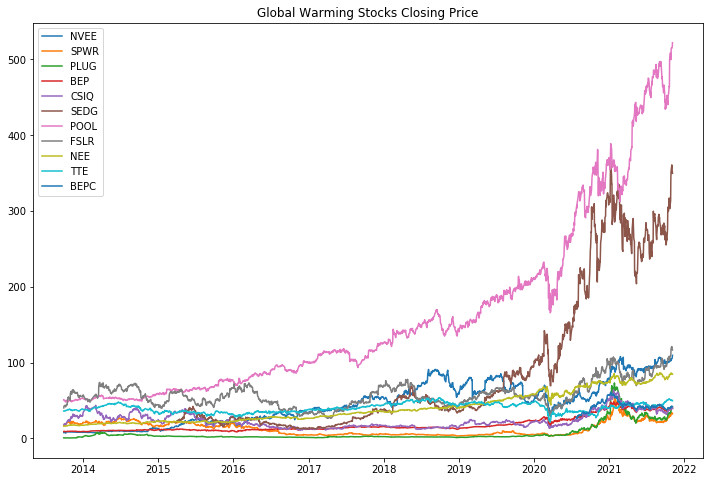

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

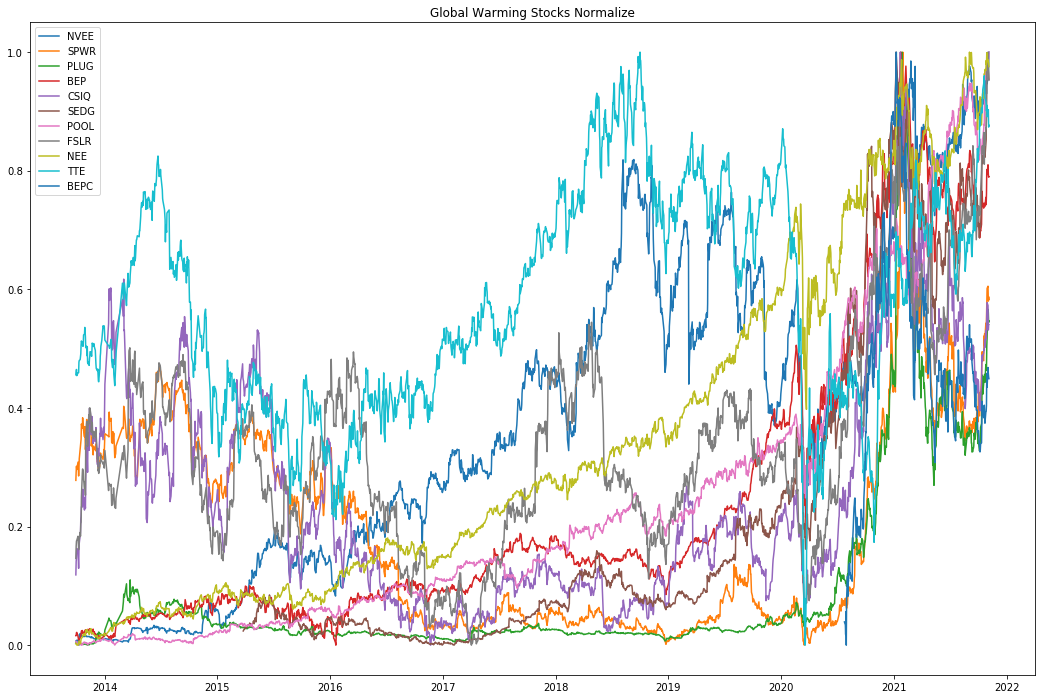

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

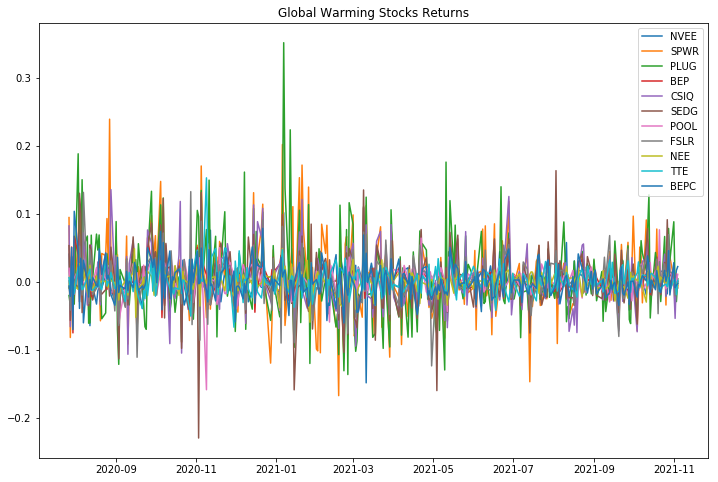

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title +' Stocks Returns')
plt.legend(labels=stock_rets.columns)

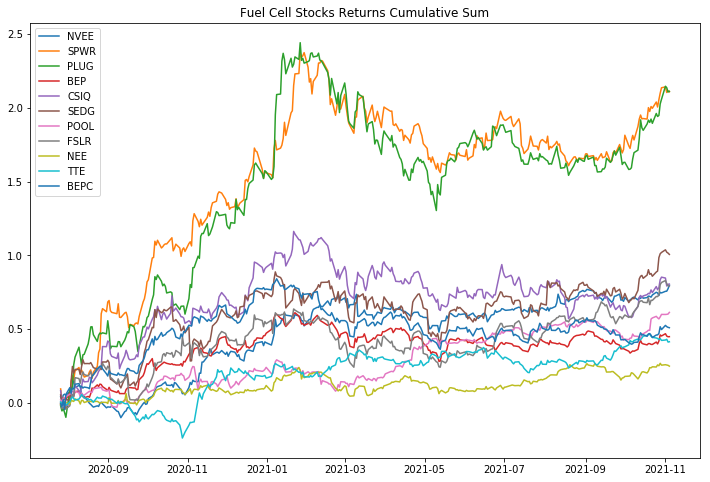

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Fuel Cell Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

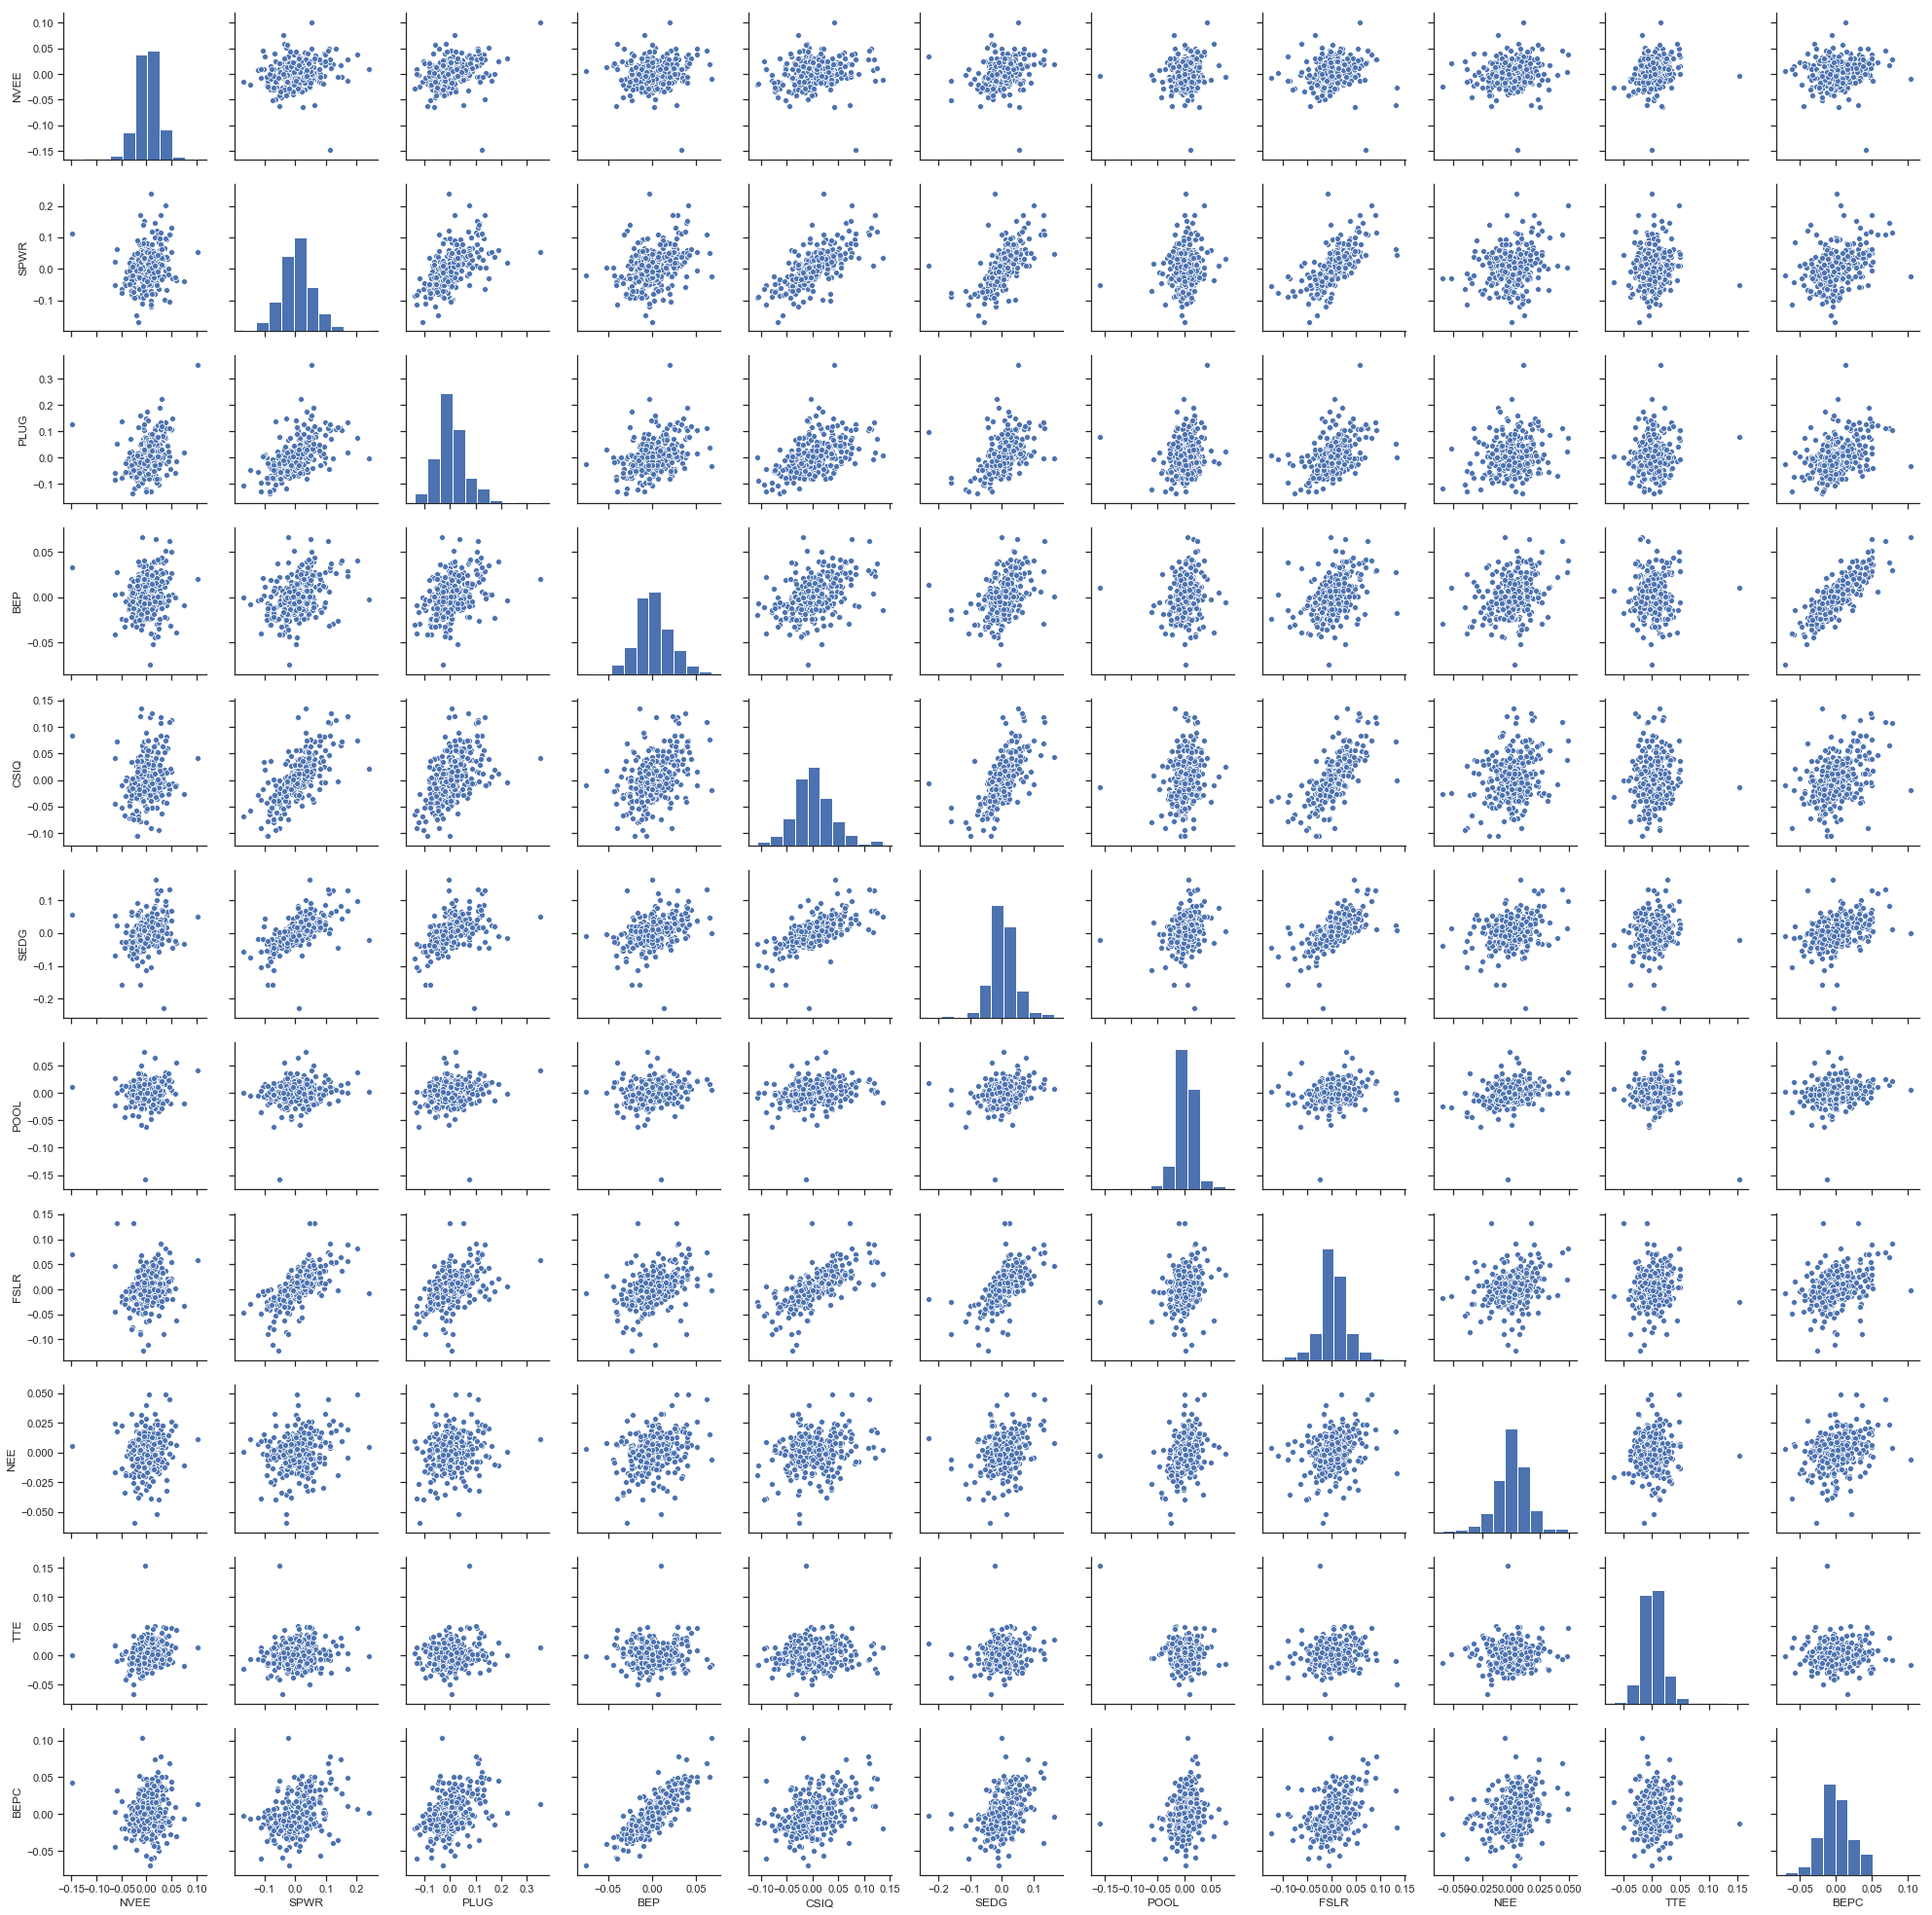

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

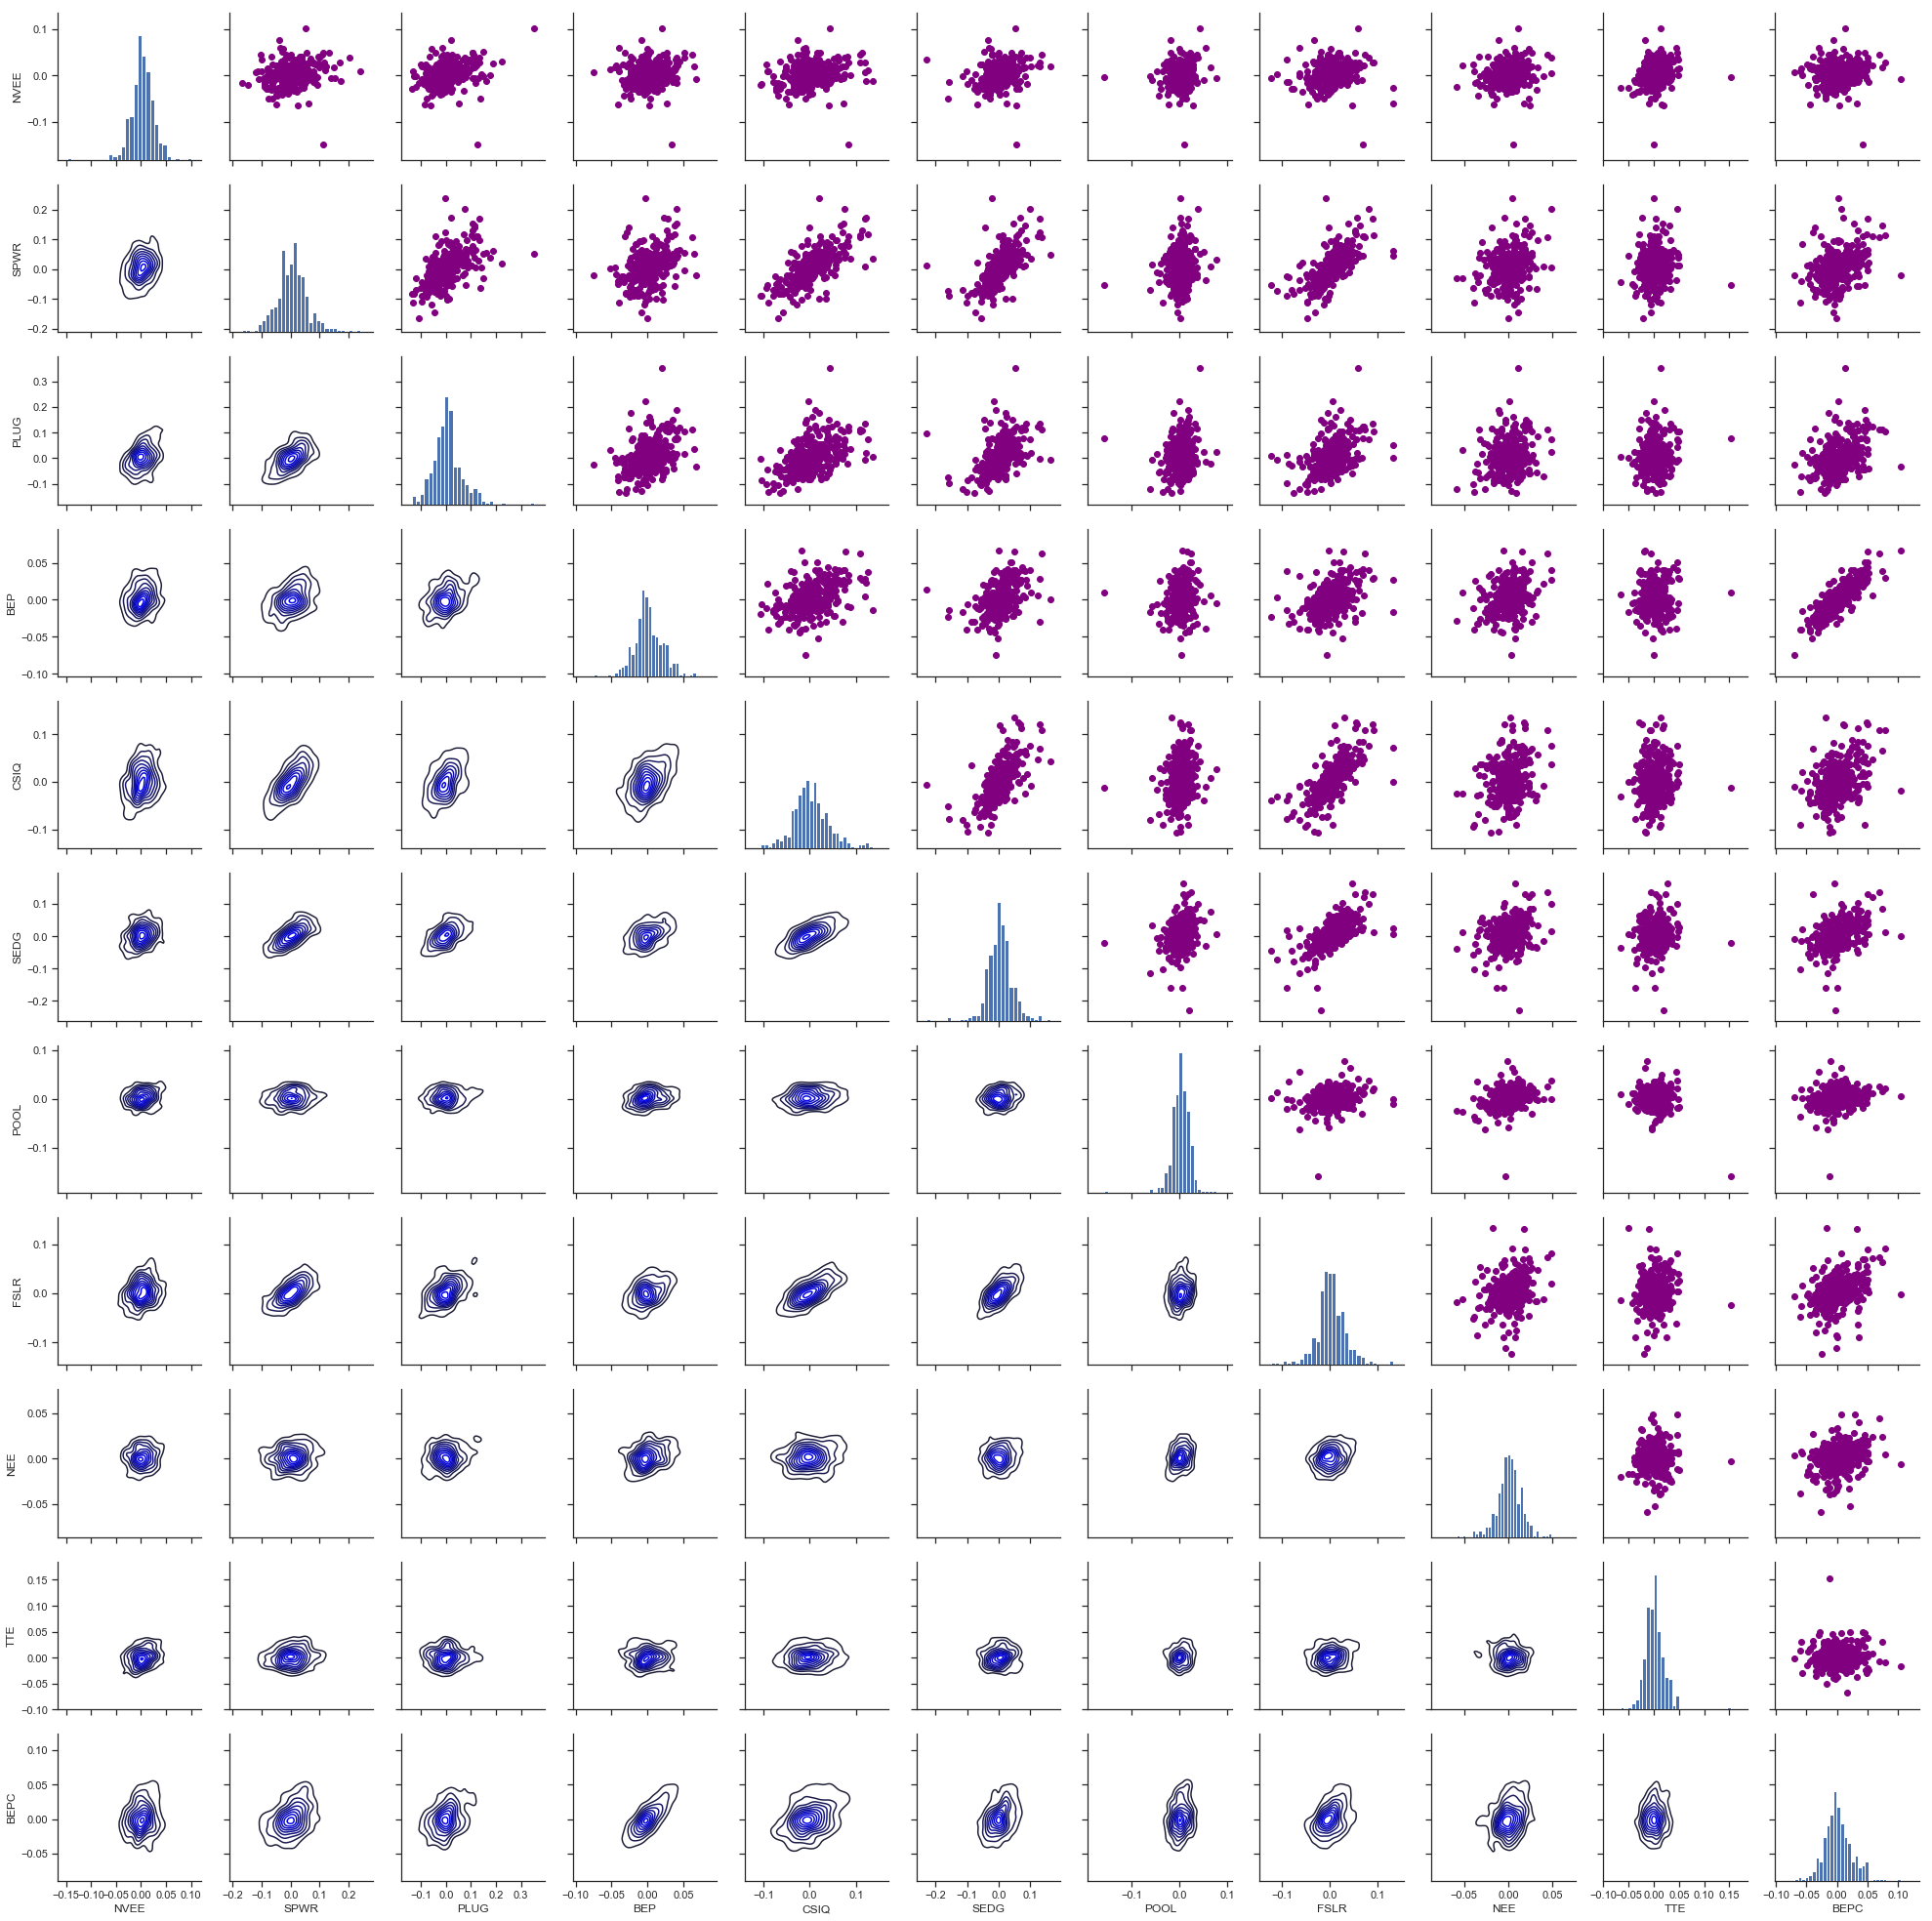

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

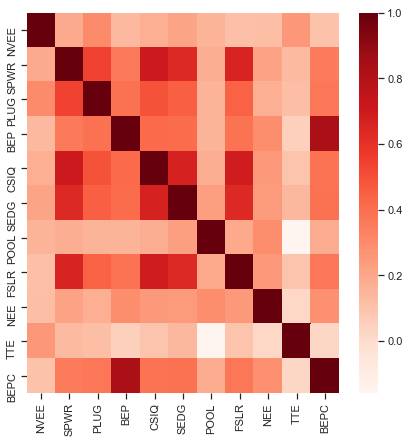

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

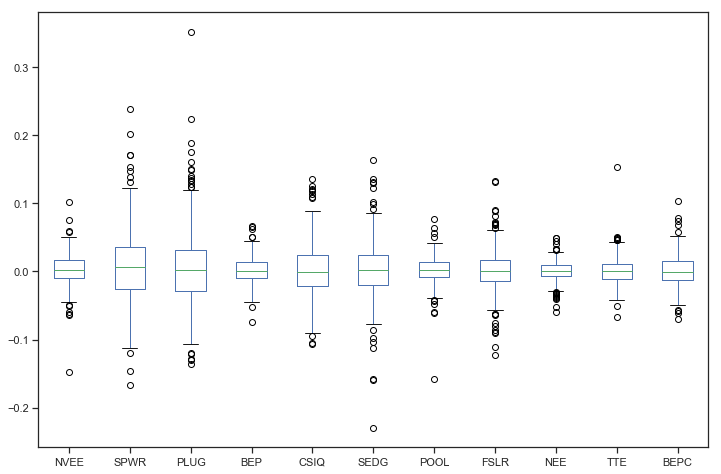

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

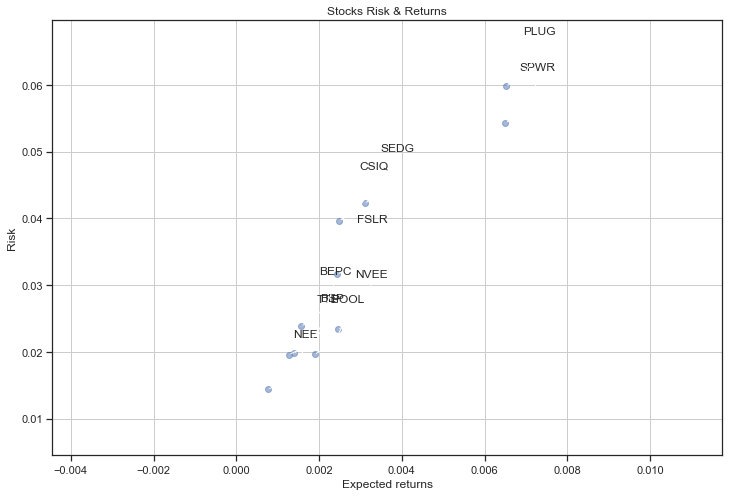

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

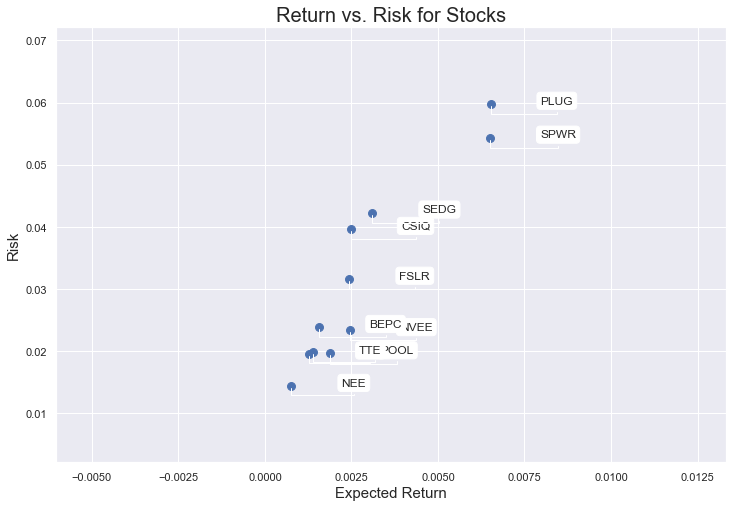

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

BEPC  BEPC    1.000000
TTE   TTE     1.000000
SPWR  SPWR    1.000000
PLUG  PLUG    1.000000
BEP   BEP     1.000000
                ...   
      TTE     0.051612
BEPC  TTE     0.024676
TTE   BEPC    0.024676
NEE   TTE     0.017561
TTE   NEE     0.017561
Length: 121, dtype: float64

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,NVEE,SPWR,PLUG,BEP,CSIQ,SEDG,POOL,FSLR,NEE,TTE,BEPC
Date,,,,,,,,,,,
2020-07-27,0.756358,0.644136,0.238165,0.467203,0.779430,0.719591,0.758914,0.488164,0.460617,0.331793,0.367810
2020-07-28,0.490816,0.210253,0.207827,0.455945,0.167386,0.440087,0.623287,0.319882,0.627426,0.245097,0.280979
2020-07-29,0.743867,0.398785,0.312239,0.887970,0.396355,0.676808,0.775764,0.510041,0.593362,0.342785,0.693133
2020-07-30,0.618695,0.360770,0.223981,0.000000,0.399533,0.562257,0.687507,0.455211,0.576697,0.299600,0.000000
2020-07-31,0.559053,0.357126,0.212156,1.000000,0.364284,0.581553,0.697879,0.472053,0.493372,0.226943,1.000000


In [24]:
Normalized_Value.corr()

,NVEE,SPWR,PLUG,BEP,CSIQ,SEDG,POOL,FSLR,NEE,TTE,BEPC
NVEE,1.000000,0.193800,0.300864,0.138266,0.175187,0.215319,0.153836,0.115589,0.118736,0.253864,0.105131
SPWR,0.193800,1.000000,0.543989,0.363911,0.701502,0.641941,0.176116,0.663810,0.220050,0.133977,0.358280
PLUG,0.300864,0.543989,1.000000,0.392858,0.495212,0.455713,0.155466,0.445188,0.173194,0.120567,0.374183
BEP,0.138266,0.363911,0.392858,1.000000,0.417114,0.415366,0.153151,0.388501,0.296366,0.051612,0.830346
CSIQ,0.175187,0.701502,0.495212,0.417114,1.000000,0.665193,0.179229,0.695459,0.248892,0.094866,0.386762
SEDG,0.215319,0.641941,0.455713,0.415366,0.665193,1.000000,0.233829,0.640604,0.247915,0.141872,0.389867
POOL,0.153836,0.176116,0.155466,0.153151,0.179229,0.233829,1.000000,0.195523,0.292391,-0.159374,0.182219
FSLR,0.115589,0.663810,0.445188,0.388501,0.695459,0.640604,0.195523,1.000000,0.251034,0.096641,0.372695
NEE,0.118736,0.220050,0.173194,0.296366,0.248892,0.247915,0.292391,0.251034,1.000000,0.017561,0.282273
TTE,0.253864,0.133977,0.120567,0.051612,0.094866,0.141872,-0.159374,0.096641,0.017561,1.000000,0.024676


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

BEPC  BEPC    1.000000
TTE   TTE     1.000000
SPWR  SPWR    1.000000
PLUG  PLUG    1.000000
BEP   BEP     1.000000
                ...   
      TTE     0.051612
BEPC  TTE     0.024676
TTE   BEPC    0.024676
NEE   TTE     0.017561
TTE   NEE     0.017561
Length: 121, dtype: float64

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
NVEE    0.002458
SPWR    0.006506
PLUG    0.006518
BEP     0.001385
CSIQ    0.002485
SEDG    0.003105
POOL    0.001892
FSLR    0.002443
NEE     0.000768
TTE     0.001278
BEPC    0.001572
dtype: float64
--------------------------------------------------
Stock risks:
NVEE    0.023364
SPWR    0.054351
PLUG    0.059808
BEP     0.019795
CSIQ    0.039656
SEDG    0.042293
POOL    0.019633
FSLR    0.031634
NEE     0.014376
TTE     0.019598
BEPC    0.023871
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
NEE,0.000768,0.014376
TTE,0.001278,0.019598
BEP,0.001385,0.019795
BEPC,0.001572,0.023871
POOL,0.001892,0.019633
FSLR,0.002443,0.031634
NVEE,0.002458,0.023364
CSIQ,0.002485,0.039656
SEDG,0.003105,0.042293
SPWR,0.006506,0.054351


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
NEE,0.000768,0.014376
TTE,0.001278,0.019598
POOL,0.001892,0.019633
BEP,0.001385,0.019795
NVEE,0.002458,0.023364
BEPC,0.001572,0.023871
FSLR,0.002443,0.031634
CSIQ,0.002485,0.039656
SEDG,0.003105,0.042293
SPWR,0.006506,0.054351


In [29]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
NVEE,0.002458,0.023364,0.062414
SPWR,0.006506,0.054351,0.101309
PLUG,0.006518,0.059808,0.092261
BEP,0.001385,0.019795,0.019425
CSIQ,0.002485,0.039656,0.037436
SEDG,0.003105,0.042293,0.049777
POOL,0.001892,0.019633,0.045439
FSLR,0.002443,0.031634,0.045611
NEE,0.000768,0.014376,-0.016157
TTE,0.001278,0.019598,0.014188


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
NVEE,0.002458,0.023364,0.062414,0.101538,-0.148152,0.002738,2.248767
SPWR,0.006506,0.054351,0.101309,0.238866,-0.166934,0.005820,-0.728381
PLUG,0.006518,0.059808,0.092261,0.351143,-0.135965,0.002063,0.474522
BEP,0.001385,0.019795,0.019425,0.067113,-0.074810,-0.000094,0.050152
CSIQ,0.002485,0.039656,0.037436,0.135475,-0.106232,-0.001131,0.126494
SEDG,0.003105,0.042293,0.049777,0.163317,-0.229157,0.002509,-0.895211
POOL,0.001892,0.019633,0.045439,0.076513,-0.158244,0.001698,1.111475
FSLR,0.002443,0.031634,0.045611,0.132540,-0.123267,0.001269,-0.145509
NEE,0.000768,0.014376,-0.016157,0.048950,-0.059134,0.001176,-0.563111
TTE,0.001278,0.019598,0.014188,0.152756,-0.066460,0.000559,0.201821


In [34]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
NVEE,0.002458,0.023364,0.062414,0.101538,-0.148152,0.002738,2.248767,7.520675e-06
SPWR,0.006506,0.054351,0.101309,0.238866,-0.166934,0.005820,-0.728381,-2.472256e-06
PLUG,0.006518,0.059808,0.092261,0.351143,-0.135965,0.002063,0.474522,1.600947e-06
BEP,0.001385,0.019795,0.019425,0.067113,-0.074810,-0.000094,0.050152,1.695605e-07
CSIQ,0.002485,0.039656,0.037436,0.135475,-0.106232,-0.001131,0.126494,4.275077e-07
SEDG,0.003105,0.042293,0.049777,0.163317,-0.229157,0.002509,-0.895211,-3.041056e-06
POOL,0.001892,0.019633,0.045439,0.076513,-0.158244,0.001698,1.111475,3.738064e-06
FSLR,0.002443,0.031634,0.045611,0.132540,-0.123267,0.001269,-0.145509,-4.924414e-07
NEE,0.000768,0.014376,-0.016157,0.048950,-0.059134,0.001176,-0.563111,-1.909712e-06
TTE,0.001278,0.019598,0.014188,0.152756,-0.066460,0.000559,0.201821,6.818318e-07


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
NVEE,0.002458,0.023364,0.062414,0.101538,-0.148152,0.002738,2.248767,7.520675e-06,0.253952
SPWR,0.006506,0.054351,0.101309,0.238866,-0.166934,0.005820,-0.728381,-2.472256e-06,0.056665
PLUG,0.006518,0.059808,0.092261,0.351143,-0.135965,0.002063,0.474522,1.600947e-06,0.405680
BEP,0.001385,0.019795,0.019425,0.067113,-0.074810,-0.000094,0.050152,1.695605e-07,0.134473
CSIQ,0.002485,0.039656,0.037436,0.135475,-0.106232,-0.001131,0.126494,4.275077e-07,0.074732
SEDG,0.003105,0.042293,0.049777,0.163317,-0.229157,0.002509,-0.895211,-3.041056e-06,NaN
POOL,0.001892,0.019633,0.045439,0.076513,-0.158244,0.001698,1.111475,3.738064e-06,0.219186
FSLR,0.002443,0.031634,0.045611,0.132540,-0.123267,0.001269,-0.145509,-4.924414e-07,0.095021
NEE,0.000768,0.014376,-0.016157,0.048950,-0.059134,0.001176,-0.563111,-1.909712e-06,0.151301
TTE,0.001278,0.019598,0.014188,0.152756,-0.066460,0.000559,0.201821,6.818318e-07,0.027246


In [36]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
SEDG,0.003105,0.042293,0.049777,0.163317,-0.229157,0.002509,-0.895211,-3.041056e-06,NaN
SPWR,0.006506,0.054351,0.101309,0.238866,-0.166934,0.005820,-0.728381,-2.472256e-06,0.056665
NEE,0.000768,0.014376,-0.016157,0.048950,-0.059134,0.001176,-0.563111,-1.909712e-06,0.151301
BEPC,0.001572,0.023871,0.023964,0.103634,-0.069895,-0.000923,-0.237987,-8.057859e-07,NaN
FSLR,0.002443,0.031634,0.045611,0.132540,-0.123267,0.001269,-0.145509,-4.924414e-07,0.095021
BEP,0.001385,0.019795,0.019425,0.067113,-0.074810,-0.000094,0.050152,1.695605e-07,0.134473
CSIQ,0.002485,0.039656,0.037436,0.135475,-0.106232,-0.001131,0.126494,4.275077e-07,0.074732
TTE,0.001278,0.019598,0.014188,0.152756,-0.066460,0.000559,0.201821,6.818318e-07,0.027246
PLUG,0.006518,0.059808,0.092261,0.351143,-0.135965,0.002063,0.474522,1.600947e-06,0.405680
POOL,0.001892,0.019633,0.045439,0.076513,-0.158244,0.001698,1.111475,3.738064e-06,0.219186


In [37]:
table['var_99'] = round((rets).quantile(0.01), 3)
table['var_95'] = round((rets).quantile(0.05), 3)

In [38]:
table.sort_values(by='Returns')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95
NEE,0.000768,0.014376,-0.016157,0.048950,-0.059134,0.001176,-0.563111,-1.909712e-06,0.151301,-0.038,-0.023
TTE,0.001278,0.019598,0.014188,0.152756,-0.066460,0.000559,0.201821,6.818318e-07,0.027246,-0.038,-0.026
BEP,0.001385,0.019795,0.019425,0.067113,-0.074810,-0.000094,0.050152,1.695605e-07,0.134473,-0.043,-0.029
BEPC,0.001572,0.023871,0.023964,0.103634,-0.069895,-0.000923,-0.237987,-8.057859e-07,NaN,-0.055,-0.034
POOL,0.001892,0.019633,0.045439,0.076513,-0.158244,0.001698,1.111475,3.738064e-06,0.219186,-0.047,-0.027
FSLR,0.002443,0.031634,0.045611,0.132540,-0.123267,0.001269,-0.145509,-4.924414e-07,0.095021,-0.088,-0.046
NVEE,0.002458,0.023364,0.062414,0.101538,-0.148152,0.002738,2.248767,7.520675e-06,0.253952,-0.058,-0.031
CSIQ,0.002485,0.039656,0.037436,0.135475,-0.106232,-0.001131,0.126494,4.275077e-07,0.074732,-0.090,-0.060
SEDG,0.003105,0.042293,0.049777,0.163317,-0.229157,0.002509,-0.895211,-3.041056e-06,NaN,-0.111,-0.056
SPWR,0.006506,0.054351,0.101309,0.238866,-0.166934,0.005820,-0.728381,-2.472256e-06,0.056665,-0.112,-0.080


In [39]:
# Pure Profit Score
df = df.dropna()
t = np.arange(0, df.shape[0]).reshape(-1, 1)
regression = LinearRegression().fit(t, df)
r_squared = regression.score(t, df)
table['PPS'] = table['CAGR'] * r_squared

In [40]:
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95,PPS
NVEE,0.002458,0.023364,0.062414,0.101538,-0.148152,0.002738,2.248767,7.520675e-06,0.253952,-0.058,-0.031,0.085756
SPWR,0.006506,0.054351,0.101309,0.238866,-0.166934,0.005820,-0.728381,-2.472256e-06,0.056665,-0.112,-0.080,0.019135
PLUG,0.006518,0.059808,0.092261,0.351143,-0.135965,0.002063,0.474522,1.600947e-06,0.405680,-0.121,-0.080,0.136992
BEP,0.001385,0.019795,0.019425,0.067113,-0.074810,-0.000094,0.050152,1.695605e-07,0.134473,-0.043,-0.029,0.045410
CSIQ,0.002485,0.039656,0.037436,0.135475,-0.106232,-0.001131,0.126494,4.275077e-07,0.074732,-0.090,-0.060,0.025236
SEDG,0.003105,0.042293,0.049777,0.163317,-0.229157,0.002509,-0.895211,-3.041056e-06,NaN,-0.111,-0.056,NaN
POOL,0.001892,0.019633,0.045439,0.076513,-0.158244,0.001698,1.111475,3.738064e-06,0.219186,-0.047,-0.027,0.074016
FSLR,0.002443,0.031634,0.045611,0.132540,-0.123267,0.001269,-0.145509,-4.924414e-07,0.095021,-0.088,-0.046,0.032087
NEE,0.000768,0.014376,-0.016157,0.048950,-0.059134,0.001176,-0.563111,-1.909712e-06,0.151301,-0.038,-0.023,0.051092
TTE,0.001278,0.019598,0.014188,0.152756,-0.066460,0.000559,0.201821,6.818318e-07,0.027246,-0.038,-0.026,0.009201
